### About Dataset
**FileName:** sales.csv

**Abstract:** Sales_Transactions_Weekly Data Set

Contains weekly purchased quantities of 800 over products over 52 weeks. Normalised values are provided too. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly)

**Based on the sales pattern we are clustering the products.**

### Read the dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sales.csv").dropna()

### Print the number of records and number of features in the dataset and do the required pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 684.3+ KB


In [4]:
df.isnull().any()

Product_Code     False
W0               False
W1               False
W2               False
W3               False
W4               False
W5               False
W6               False
W7               False
W8               False
W9               False
W10              False
W11              False
W12              False
W13              False
W14              False
W15              False
W16              False
W17              False
W18              False
W19              False
W20              False
W21              False
W22              False
W23              False
W24              False
W25              False
W26              False
W27              False
W28              False
                 ...  
Normalized 22    False
Normalized 23    False
Normalized 24    False
Normalized 25    False
Normalized 26    False
Normalized 27    False
Normalized 28    False
Normalized 29    False
Normalized 30    False
Normalized 31    False
Normalized 32    False
Normalized 33    False
Normalized 

In [5]:
# Separating the features and product code.
df_features = df.loc[:,'W0':'W51']
y = df.loc[:,'Product_Code']


### Divide the normalized values as feature set from the given dataset 

In [6]:
df_norm_features = df.loc[:,'Normalized 0':'Normalized 51']

### Calculate the Convariance Matrix

In [7]:
X_cv = np.cov(df_norm_features.T)
X_cv

array([[0.07091926, 0.03405328, 0.03506864, ..., 0.01889971, 0.01470466,
        0.00104419],
       [0.03405328, 0.07915388, 0.03784508, ..., 0.01642457, 0.01081432,
        0.00301247],
       [0.03506864, 0.03784508, 0.08078894, ..., 0.01848616, 0.00883466,
        0.00212499],
       ...,
       [0.01889971, 0.01642457, 0.01848616, ..., 0.08217694, 0.01883491,
        0.01859996],
       [0.01470466, 0.01081432, 0.00883466, ..., 0.01883491, 0.08714106,
        0.02234657],
       [0.00104419, 0.00301247, 0.00212499, ..., 0.01859996, 0.02234657,
        0.11721045]])

### Print the Eigen Values and Eigen vectors

In [8]:
eig_vals, eig_vecs = np.linalg.eig(X_cv)
print("Eigen Values:", eig_vals)
print("Eigen Vectors:", eig_vecs)

Eigen Values: [1.34152479 0.18219364 0.0986116  0.0857389  0.08446319 0.07998295
 0.07846918 0.0761355  0.07075259 0.07019014 0.06911754 0.06492005
 0.0261379  0.06288495 0.06172724 0.06025813 0.0280505  0.05837944
 0.02850205 0.05701922 0.05655943 0.0557495  0.05464338 0.02956828
 0.03072865 0.03115098 0.03181151 0.0321239  0.03295854 0.05313591
 0.03408578 0.05231373 0.05149903 0.05071512 0.03494019 0.0497228
 0.04892104 0.04839854 0.03613945 0.03708202 0.03791984 0.03840187
 0.03927773 0.04692108 0.04595939 0.04550852 0.04422883 0.04383471
 0.04138722 0.04303638 0.04193467 0.04237   ]
Eigen Vectors: [[-0.15736788 -0.05950599 -0.08656352 ... -0.19705464 -0.08659698
  -0.02694095]
 [-0.16555895 -0.09579254 -0.02243476 ...  0.08230969 -0.00925238
   0.16801714]
 [-0.17239816 -0.08580657  0.03365034 ...  0.05357687  0.11720124
   0.19413771]
 ...
 [-0.09297563  0.24063797  0.13298535 ... -0.16377078 -0.10669943
   0.13272679]
 [-0.07935733  0.32137178  0.02817116 ... -0.02816693  0.2045

### Calculate the Cumulative Explained Variance

In [9]:
eig_tot = sum(eig_vals)
print(eig_tot)

eig_var = [(arr/eig_tot)*100 for arr in eig_vals] 
print(eig_var) 

4.04808750879116
[33.139718239147925, 4.500733644793275, 2.436004658367022, 2.1180100616694815, 2.0864961018639496, 1.9758206434050383, 1.938425953481, 1.8807770068966345, 1.7478028545481819, 1.7339087713230588, 1.7074122199345023, 1.6037216084962138, 0.6456850845863734, 1.553448475682545, 1.5248494656701375, 1.4885578822897017, 0.692932130080755, 1.442148758972243, 0.7040868520551279, 1.4085471317963263, 1.3971888286139322, 1.377181181563737, 1.3498566176196227, 0.7304258166692852, 0.7590905556056001, 0.769523317820941, 0.7858403947941109, 0.7935573781155938, 0.8141756338343248, 1.312617713697887, 0.8420217380001184, 1.2923072203437755, 1.2721818206773041, 1.252816768101284, 0.8631283242727782, 1.228303413941276, 1.2084975130103635, 1.1955902836580652, 0.8927535775884194, 0.916037980549216, 0.9367347841955117, 0.9486423111753937, 0.9702785808096451, 1.159092550962693, 1.1353358151587496, 1.1241980619561516, 1.092585698029168, 1.0828499390717257, 1.0223895827905523, 1.0631287459660956,

### Plot Cumulative explained variance

<BarContainer object of 52 artists>

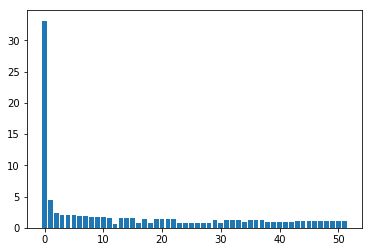

In [10]:
plt.bar(range(len(eig_var)),eig_var)

### Apply KMeans and plot the elbow graph to decide number of clusters on the original data from step-3

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics


from scipy.spatial.distance import cdist

In [12]:
#Original Data set 
X = df_features


#Iterating values of k from 1 to 10 fit K means model Using c distance - Get the measure for Sum of squares error.

distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

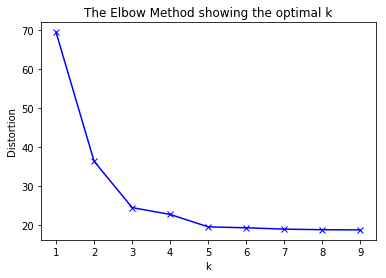

In [13]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
# Up until the 3rd cluster, the distorting movement is vertical and beyond that it becomes more horizontal

# Hence we could say, k = 3

### Apply KMeans with the above decided number of clusters and give the labels count

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

### Apply PCA with number of componenets as 10 and Repeat the above step

In [17]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=10).fit_transform(X)

In [18]:
#Iterating values of k from 1 to 10 fit K means model Using c distance - Get the measure for Sum of squares error.

distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_reduced)
    kmeanModel.fit(X_reduced)
    distortions.append(
        sum(np.min(cdist(X_reduced, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_reduced.shape[0])

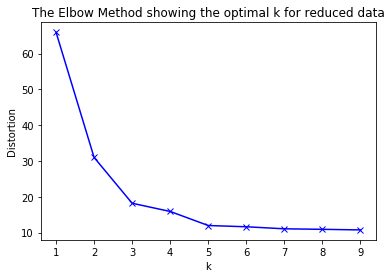

In [19]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for reduced data')
plt.show()

In [20]:
# Up until the 3rd cluster, the distorting movement is vertical and beyond that it becomes more horizontal